In [1]:
suppressPackageStartupMessages({library(tidyquant)
library(tidyverse)})
setwd("C:/Users/User/Documents/Meus Arquivos/Códigos")
source("Funções.r")
options(warn = -1)

In [2]:
#Todas as ações do Ibovespa atualmente
acoes <- sort(unique(c("ABEV3.SA","AZUL4.SA","B3SA3.SA","BBDC3.SA",
                  "BBDC4.SA","BBSE3.SA","BEEF3.SA","BPAC11.SA",
                  "BRAP4.SA","BRFS3.SA","BRKM5.SA",
                  "BRML3.SA","BTOW3.SA","CCRO3.SA","CIEL3.SA",
                  "CMIG4.SA","COGN3.SA","CPFE3.SA","CRFB3.SA",
                  "CSAN3.SA","CVCB3.SA","CYRE3.SA","ECOR3.SA",
                  "EGIE3.SA","ELET3.SA","ELET6.SA","EMBR3.SA",
                  "ENBR3.SA","ENGI11.SA","EQTL3.SA","FLRY3.SA",
                  "GGBR4.SA","GOAU4.SA","GOLL4.SA",
                  "HGTX3.SA","HYPE3.SA","IGTA3.SA",
                  "IRBR3.SA","ITSA4.SA","ITUB4.SA","JBSS3.SA",
                  "KLBN11.SA","LAME4.SA","LREN3.SA","MGLU3.SA",
                  "MRFG3.SA","MRVE3.SA","MULT3.SA",
                  "PETR3.SA","PETR4.SA","QUAL3.SA",
                  "RADL3.SA","RAIL3.SA","RENT3.SA","SANB11.SA",
                  "SBSP3.SA","SULA11.SA","SUZB3.SA","TAEE11.SA",
                  "TIMP3.SA","UGPA3.SA",
                  "VALE3.SA","VIVT4.SA","VVAR3.SA","WEGE3.SA",
                  "TRPL4.SA","ENEV3.SA","BRAP4.SA",
                  "QUAL3.SA")))

In [17]:
#Parâmetros da simulação
n_start <- 2
n_acoes <- 20
n_sim <- 50

In [18]:
#Simulação
sim <- simulacao_desvios(acoes, n_acoes = n_acoes,
                         otimizacao = F, n_sim = n_sim, n_start = n_start)
n_acoes <- n_start:n_acoes

In [19]:
#Manipulação dos dados
medias_a <- apply(sim$Sd,2,mean)
desv_g <- sim$Sd %>%
  as.data.frame() %>%
  gather(key = "n_acoes", value = "Sd")
a <- gsub("\\D","",desv_g$n_acoes) %>% as.numeric+1
desv_g$n_acoes <- a
ret_g <- sim$Returns %>%
  as.data.frame() %>%
  gather(key = "n_acoes", value = "Mu")
a <- gsub("\\D","",ret_g$n_acoes) %>% as.numeric+1
ret_g$n_acoes <- a

In [20]:
#Coletando médias e outros dados
desvio_m <- data.frame(n_acoes = n_acoes, Sd = medias_a)
medias_r <- apply(sim$Returns,2,mean)
ret_m <- data.frame(n_acoes = n_acoes, mu = medias_r)
menor_sd <- desvio_m$n_acoes[which.min(desvio_m$Sd)]
maior_ret <- ret_m$n_acoes[which.max(ret_m$mu)]
sharpe <- desv_g %>%
  mutate(Sd = Sd*sqrt(252),Mu = ret_g$Mu*252, Sharpe = (Mu)/(Sd))
sharpe_m <- sharpe %>%
  group_by(n_acoes) %>%
  summarise(Sharpe = mean(Sharpe))
maior_s <- sharpe_m$n_acoes[which.max(sharpe_m$Sharpe)]

`summarise()` ungrouping output (override with `.groups` argument)



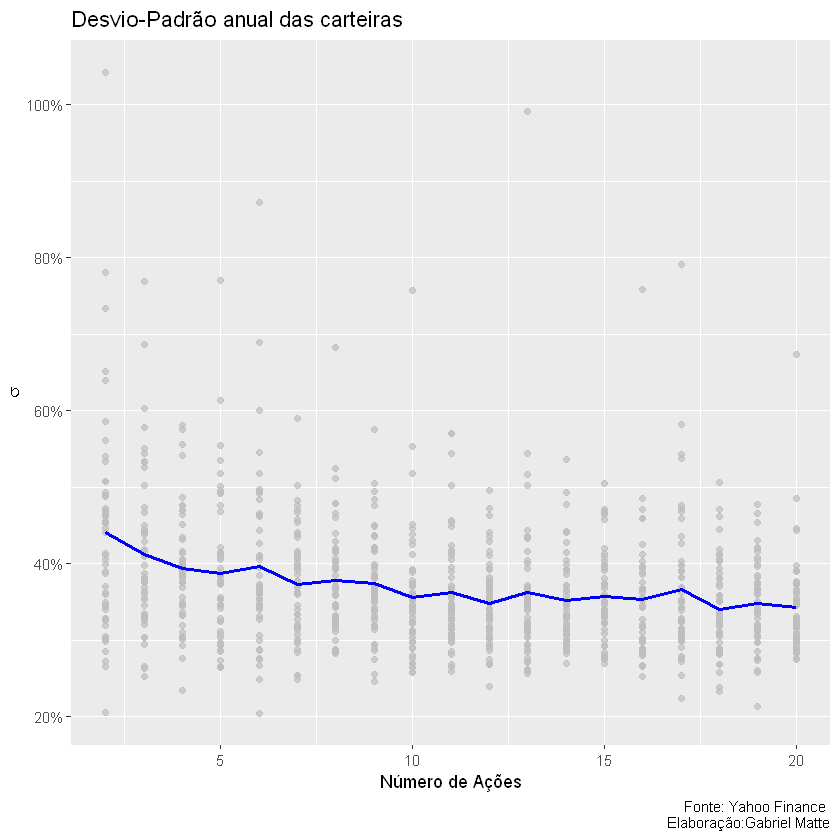

In [21]:
#Plotando os resultados
ggplot(desv_g, aes(x = n_acoes, y = Sd*sqrt(252)))+
  geom_point(alpha = 0.7, col = "grey")+
  geom_line(data = desvio_m, 
            mapping = aes(x = n_acoes, y = Sd*sqrt(252)),
            size = 1, col = "blue")+
  scale_y_continuous(labels = scales::percent)+
  labs(x = "Número de Ações", 
       y = expression(sigma), 
       title = "Desvio-Padrão anual das carteiras",
       caption = "Fonte: Yahoo Finance \n Elaboração:Gabriel Matte")

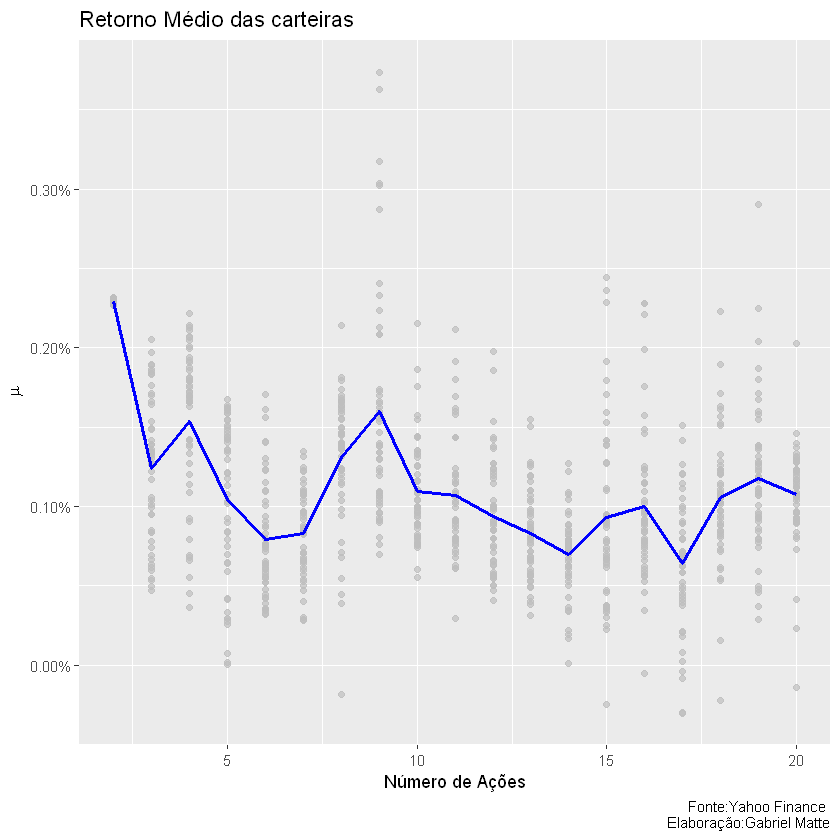

In [22]:
ggplot(ret_g, aes(x = n_acoes, y = Mu))+
  geom_point(alpha = 0.7, col = "grey")+
  geom_line(data = ret_m, 
            mapping = aes(x = n_acoes, y = mu),
            size = 1, col = "blue")+
  scale_y_continuous(labels = scales::percent)+
  labs(x = "Número de Ações", y = expression(mu),
       title = "Retorno Médio das carteiras",
       caption = "Fonte:Yahoo Finance \n Elaboração:Gabriel Matte")

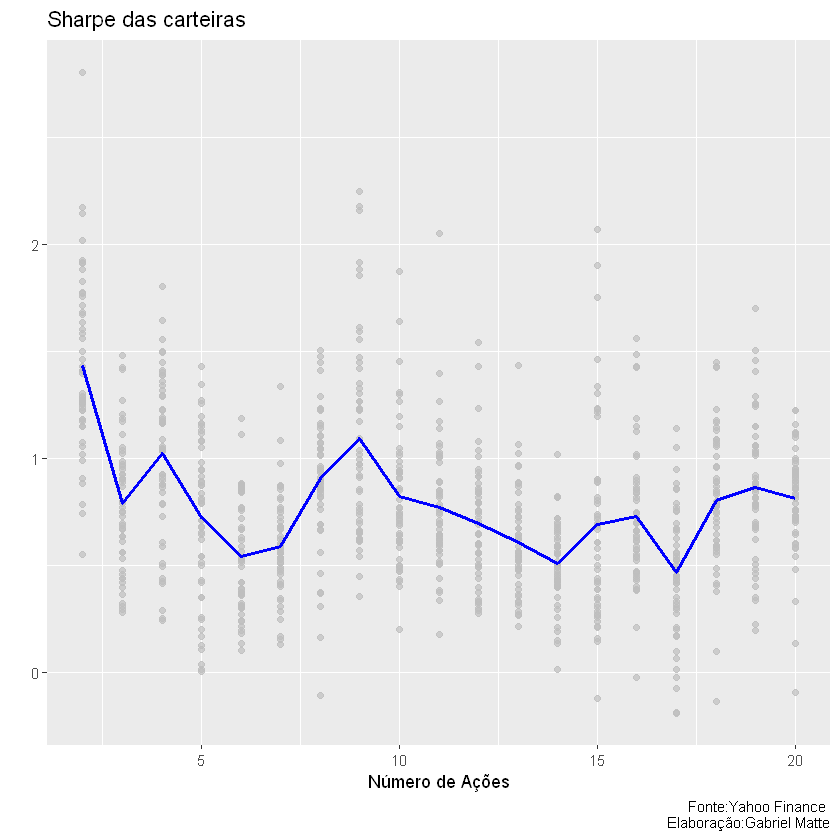

In [23]:
ggplot(sharpe, aes(x = n_acoes, y = Sharpe))+
  geom_point(alpha = 0.7, col = "grey")+
  geom_line(data = sharpe_m, 
            mapping = aes(x = n_acoes, y = Sharpe),
            size = 1, col = "blue")+
  labs(x = "Número de Ações", 
       y = "", 
       title = "Sharpe das carteiras",
       caption = "Fonte:Yahoo Finance \n Elaboração:Gabriel Matte")